
# <h2 style="color: #FF69B4">Heart Disease Prediction ❤️🔬</h2>

# <img src="https://repository-images.githubusercontent.com/543430917/d048e410-7994-4a6f-9180-8a3bd8df902b" width="150%" height="450" />

### 📌 Project Overview 

This notebook builds a machine learning classification model to predict heart disease using clinical features from patient records.

Workflow:
- Data cleaning & preprocessing
- Exploratory data analysis (EDA)
- Feature encoding & imputation
- Scaling, training & evaluation
- Save best-performing model & scaler

---


# Import libraries

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib
import warnings
warnings.filterwarnings('ignore')


In [205]:
# Load dataset
df = pd.read_csv('E:\DEPI\DEPI_Projects\Heart_Disease\data\heart_disease_uci.csv')
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Dataset overview


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [207]:
print(df.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [208]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [209]:
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


### Data Cleaning & Preparation


In [210]:
# Convert 'num' to binary target: 0 = No Disease, 1 = Has Disease
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Drop irrelevant columns (like ID)
df.drop(['id', 'num'], axis=1, inplace=True)

# View updated structure
df.head()


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Exploratory Data Analysis

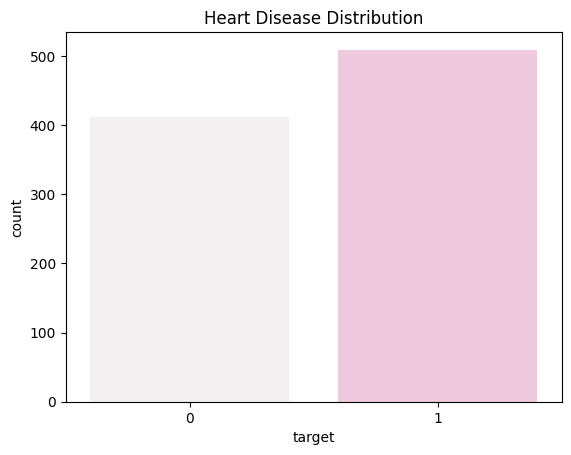

In [211]:
sns.countplot(x='target', data=df, palette=sns.light_palette("deeppink"))
plt.title("Heart Disease Distribution")
plt.show()

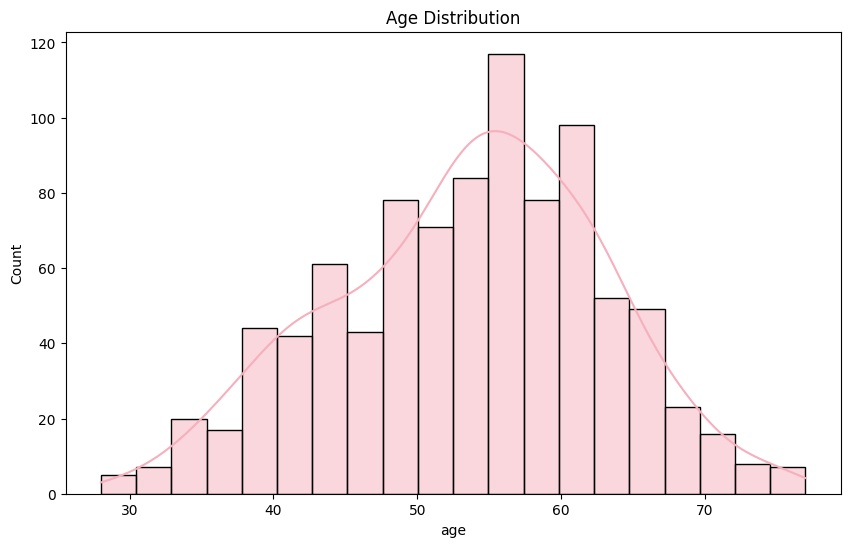

In [212]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color="#f6afbd")
plt.title("Age Distribution")
plt.show()

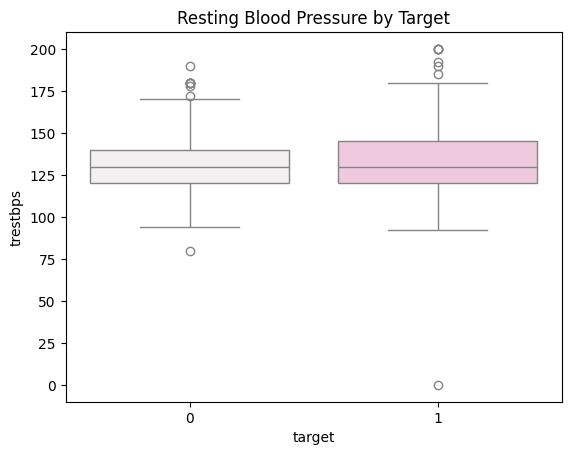

In [213]:
# boxplot
sns.boxplot(x='target', y='trestbps', data=df ,palette=sns.light_palette("deeppink"))
plt.title("Resting Blood Pressure by Target")
plt.show()

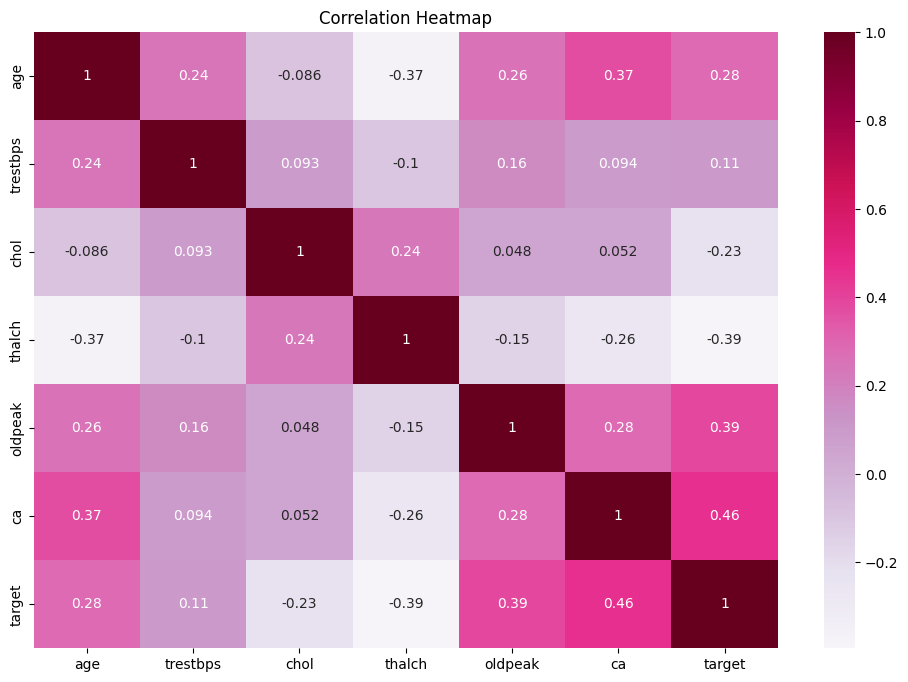

In [214]:
# Correlation heatmap (numeric only)
numeric_cols = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='PuRd')
plt.title("Correlation Heatmap")
plt.show()

### Encoding Categorical Features

In [215]:
# Identify categorical columns
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'dataset']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


### Imputation

In [216]:
# Handle missing values after encoding
imputer = SimpleImputer(strategy='most_frequent')  # or use 'mean' for numerical
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)


### Train/Test Split

In [217]:
# Features and target
X = df_imputed.drop('target', axis=1)
y = df_imputed['target']

In [218]:
# Stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Feature Scaling

In [219]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [220]:
# ✅ Ensure no missing values
print(np.isnan(X_train).sum().sum(), np.isnan(X_test).sum().sum())  # Output: 0 0

0 0


### Model Training

In [221]:
# Train multiple models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n🔍 {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



🔍 Logistic Regression
Accuracy: 0.8207
Confusion Matrix:
[[62 20]
 [13 89]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.79        82
         1.0       0.82      0.87      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.82       184
weighted avg       0.82      0.82      0.82       184


🔍 Random Forest
Accuracy: 0.8424
Confusion Matrix:
[[64 18]
 [11 91]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.78      0.82        82
         1.0       0.83      0.89      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184


🔍 K-Nearest Neighbors
Accuracy: 0.8424
Confusion Matrix:
[[62 20]
 [ 9 93]]
Classification Report:
              precision    recall  f1-score   suppor

### Model Accuracy Comparison

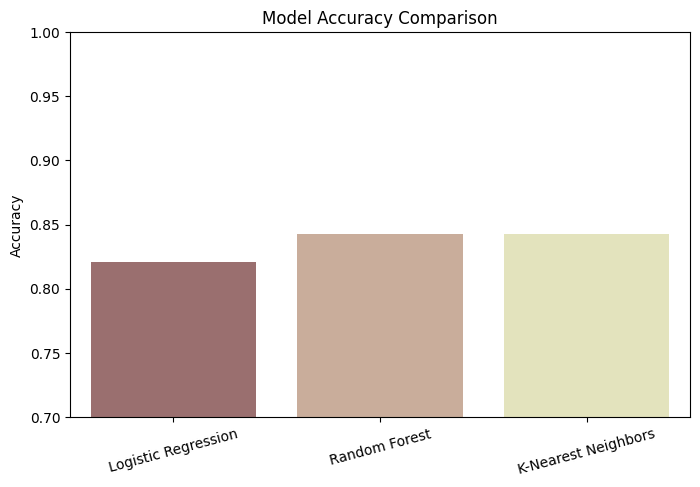

In [222]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="pink")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=15)
plt.show()

### Save Best Model

In [223]:
# Save best-performing model (Random Forest)
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Define model directory (outside notebook)
MODEL_DIR = os.path.abspath("E:/DEPI/DEPI_Projects/Heart_Disease/models")

# Save model and scaler inside 'models/'
joblib.dump(best_model, os.path.join(MODEL_DIR, 'heart_disease_model.pkl'))
joblib.dump(scaler, os.path.join(MODEL_DIR, 'scaler.pkl'))

print("✅ Best model saved to models/heart_disease_model.pkl")
print("✅ Scaler saved to models/scaler.pkl")


print("✅ Best model saved as 'heart_disease_model.pkl'")
print("✅ Scaler saved as 'scaler.pkl'")

✅ Best model saved to models/heart_disease_model.pkl
✅ Scaler saved to models/scaler.pkl
✅ Best model saved as 'heart_disease_model.pkl'
✅ Scaler saved as 'scaler.pkl'


### Conclusion

 This notebook built a robust pipeline to detect heart disease using machine learning.  
 After comparing models, **Random Forest** classifier gave the best accuracy. 
 
---